In [1]:
import os # operating system
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics
from scipy import stats
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Attribute DataSet.xlsx to Attribute DataSet.xlsx


In [117]:
dress = pd.read_excel('Attribute DataSet.xlsx')

In [118]:
dress.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [119]:
dress.tail()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0
497,532874347,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,NaN,lace,solid,1
498,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print,1
499,919930954,Casual,Low,4.4,free,Summer,v-neck,short,empire,cotton,Corduroy,lace,solid,0


In [120]:
dress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [121]:
dress.shape

(500, 14)

In [122]:
dress.dtypes

Dress_ID            int64
Style              object
Price              object
Rating            float64
Size               object
Season             object
NeckLine           object
SleeveLength       object
waiseline          object
Material           object
FabricType         object
Decoration         object
Pattern Type       object
Recommendation      int64
dtype: object

In [123]:
dress.describe()

,Dress_ID,Rating,Recommendation
count,5.000000e+02,500.000000,500.000000
mean,9.055417e+08,3.528600,0.420000
std,1.736190e+08,2.005364,0.494053
min,4.442820e+08,0.000000,0.000000
25%,7.673164e+08,3.700000,0.000000
50%,9.083296e+08,4.600000,0.000000
75%,1.039534e+09,4.800000,1.000000
max,1.253973e+09,5.000000,1.000000


In [124]:
dress.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [125]:
miss = dress.isna().sum()
miss /= dress.shape[0]
miss *=100
miss = miss.to_frame().rename(columns={0:'Precentage Of Missing Values'})
miss

,Precentage Of Missing Values
Dress_ID,0.0
Style,0.0
Price,0.4
Rating,0.0
Size,0.0
Season,0.4
NeckLine,0.6
SleeveLength,0.4
waiseline,17.4
Material,25.6


In [126]:
df = dress.fillna(dress.mode().iloc[0])

In [127]:
df.isnull().sum()

Dress_ID          0
Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
waiseline         0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
dtype: int64

In [128]:
miss = df.isna().sum()
miss /= df.shape[0]
miss *=100
miss = miss.to_frame().rename(columns={0:'Precentage Of Missing Values'})
miss

,Precentage Of Missing Values
Dress_ID,0.0
Style,0.0
Price,0.0
Rating,0.0
Size,0.0
Season,0.0
NeckLine,0.0
SleeveLength,0.0
waiseline,0.0
Material,0.0


In [129]:
df_cleaned = df.drop(['Dress_ID'], axis=1)
df_cleaned.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,cotton,chiffon,ruffles,animal,1
1,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,chiffon,ruffles,animal,0
2,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,chiffon,lace,print,0
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [130]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

#labelEncoder = LabelEncoder()

columns_label = ['Style', 'Price', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type']

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


#labelEncoder.fit(df_cleaned[columns_label])
#df_cleaned[columns_label] = labelEncoder.transform(df_cleaned[columns_label])
#columns_label

In [131]:
new_df = MultiColumnLabelEncoder(columns = ['Style', 'Price', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type']).fit_transform(df_cleaned)

In [132]:
new_df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,5,2,4.6,1,3,7,10,1,3,3,20,0,1
1,1,2,0.0,0,3,7,0,2,8,3,20,0,0
2,11,1,0.0,0,0,7,4,2,15,3,12,10,0
3,0,0,4.6,0,2,7,4,2,18,3,8,10,1
4,7,2,4.5,1,3,7,1,2,2,3,3,2,0


In [133]:
X = np.array(new_df.drop(['Recommendation'], 1).astype(float))
y = np.array(new_df['Recommendation'])

In [134]:
kmeans_kwargs = {
 "init": "random",
    "n_init": 10,
    "max_iter": 300,
     "random_state": 42,
}

 # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

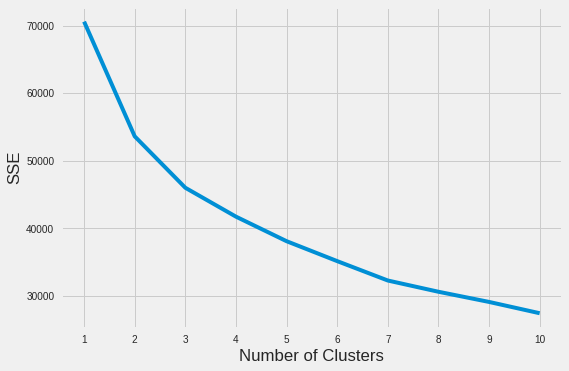

In [135]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [136]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [137]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.492


In [138]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [139]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.314


In [140]:
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [141]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.242


In [142]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [143]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.492


In [144]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [145]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [146]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.534


In [147]:
# Multiple categorical columns
columns_label = ['Style', 'Price', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type']

df_dum = pd.get_dummies(df_cleaned, columns=columns_label)
df_dum.head()

,Rating,Recommendation,Style_Brief,Style_Casual,Style_Flare,Style_Novelty,Style_OL,Style_Sexy,Style_bohemian,Style_cute,Style_fashion,Style_party,Style_sexy,Style_vintage,Style_work,Price_Average,Price_High,Price_Low,Price_Medium,Price_high,Price_low,Price_very-high,Size_L,Size_M,Size_S,Size_XL,Size_free,Size_s,Size_small,Season_Automn,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Season_spring,Season_summer,Season_winter,NeckLine_Scoop,NeckLine_Sweetheart,NeckLine_backless,...,FabricType_woolen,FabricType_worsted,Decoration_Tiered,Decoration_applique,Decoration_beading,Decoration_bow,Decoration_button,Decoration_cascading,Decoration_crystal,Decoration_draped,Decoration_embroidary,Decoration_feathers,Decoration_flowers,Decoration_hollowout,Decoration_lace,Decoration_none,Decoration_pearls,Decoration_plain,Decoration_pleat,Decoration_pockets,Decoration_rivet,Decoration_ruched,Decoration_ruffles,Decoration_sashes,Decoration_sequined,Decoration_tassel,Pattern Type_animal,Pattern Type_character,Pattern Type_dot,Pattern Type_floral,Pattern Type_geometric,Pattern Type_leapord,Pattern Type_leopard,Pattern Type_none,Pattern Type_patchwork,Pattern Type_plaid,Pattern Type_print,Pattern Type_solid,Pattern Type_splice,Pattern Type_striped
0,4.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4.6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [148]:
X = np.array(df_dum.drop(['Recommendation'], 1).astype(float))
y = np.array(df_dum['Recommendation'])

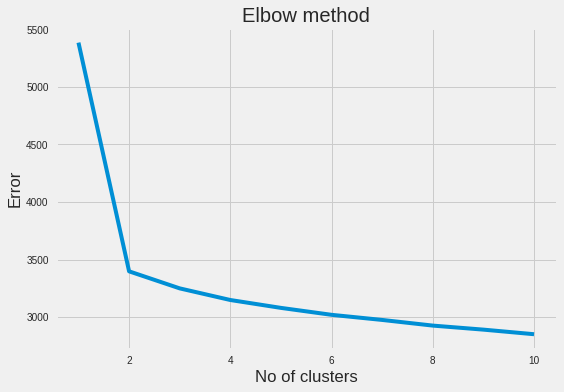

In [149]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [150]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.526


In [151]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [152]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [153]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.48
